In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit #%timeit beore code line
from citipy import citipy
%matplotlib inline

import requests
#import api key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# unpack zip object into a list 
# (You can only unzip a zipped tuple once before 
#     it is removed from the computer’s memory.)

coordinates = list(lat_lngs)
coordinates[4]

(-1.6901662280492218, 55.97265142745184)

In [4]:
# Match coordinates up with cities using citipy
# Create a list for holding the cities.
# to fix : costal cities are favored as 70% coordinates are water

cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

632

In [5]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | deputatskiy
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | zwedru
Processing Record 11 of Set 1 | rocha
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | matara
Processing Record 16 of Set 1 | aranos
Processing Record 17 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 18 of Set 1 | haines junction
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | iquique
Processing Record 21 of Set 1 | rikitea
Processing Recor

Processing Record 38 of Set 4 | maceio
Processing Record 39 of Set 4 | arlit
Processing Record 40 of Set 4 | sioux lookout
Processing Record 41 of Set 4 | okhotsk
Processing Record 42 of Set 4 | naze
Processing Record 43 of Set 4 | maniitsoq
Processing Record 44 of Set 4 | phuket
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | deloraine
Processing Record 47 of Set 4 | ogulin
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | ariano irpino
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | clarence town
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | ewa beach
Processing Record 7 of Set 5 | buckeye
Processing Record 8 of Set 5 | anloga
Processing Record 9 of Set 5 | bloomfield
Processing Record 10 of Set 5 | kolosovka
Processing Record 11 of Set 5 | paita
Processing Record 12 of Set 5 | zh

Processing Record 26 of Set 8 | aguililla
Processing Record 27 of Set 8 | presidencia roque saenz pena
Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | pedernales
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | bondowoso
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | mae hong son
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | sawankhalok
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | oxelosund
Processing Record 39 of Set 8 | satitoa
City not found. Skipping...
Processing Record 40 of Set 8 | saint-louis
Processing Record 41 of Set 8 | wanxian
Processing Record 42 of Set 8 | kathu
Processing Record 43 of Set 8 | ndouci
City not found. Skipping...
Processing Record 44 of Set 8 | vega de alatorre
Processing Record 45 of Set 8 | kaeo
Processing Record 46 of Set 8 | saint-augustin
Processing Record 47 of Set 8 | payo
P

Processing Record 14 of Set 12 | duluth
Processing Record 15 of Set 12 | puerto ayacucho
Processing Record 16 of Set 12 | miles city
Processing Record 17 of Set 12 | angoche
Processing Record 18 of Set 12 | port hardy
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | sampit
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | talara
Processing Record 24 of Set 12 | meyungs
City not found. Skipping...
Processing Record 25 of Set 12 | aykhal
Processing Record 26 of Set 12 | truth or consequences
Processing Record 27 of Set 12 | dhidhdhoo
Processing Record 28 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 29 of Set 12 | houma
Processing Record 30 of Set 12 | san patricio
Processing Record 31 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 12 | shitanjing
Processing Record 33 of Set 12 | manjacaze
Processing Record 34 of Set 12 | pangnirtung
Proc

In [7]:
len(city_data)

579

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Deputatskiy,RU,2020-05-28 19:12:15,69.30,139.90,30.78,98,100,5.39
1,Carnarvon,AU,2020-05-28 19:12:15,-24.87,113.63,64.60,64,0,11.34
2,Jamestown,US,2020-05-28 19:09:55,42.10,-79.24,71.01,94,90,5.82
3,Victoria,HK,2020-05-28 19:11:21,22.29,114.16,80.01,88,27,10.00
4,Albany,US,2020-05-28 19:08:38,42.60,-73.97,80.01,75,70,1.01
5,Puerto Ayora,EC,2020-05-28 19:12:15,-0.74,-90.35,80.60,69,75,10.29
6,Khatanga,RU,2020-05-28 19:12:15,71.97,102.50,35.73,95,100,14.09
7,Vaini,TO,2020-05-28 19:12:15,-21.20,-175.20,71.60,94,75,4.70
8,Zwedru,LR,2020-05-28 19:12:16,6.07,-8.13,75.83,95,100,4.14
9,Rocha,UY,2020-05-28 19:12:16,-34.48,-54.33,66.43,67,0,1.81


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'05/28/20'

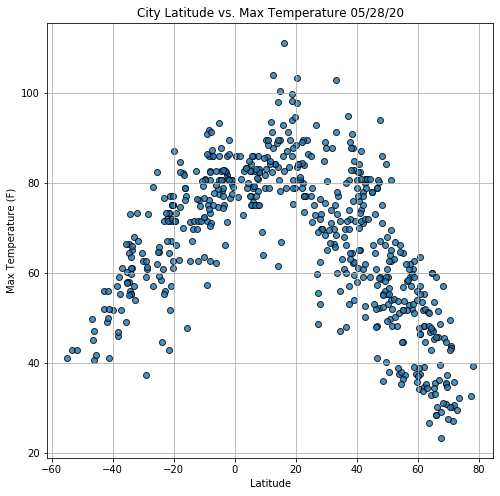

In [12]:
# Build the scatter plot for latitude vs. max temperature.



plt.figure(figsize=(8,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

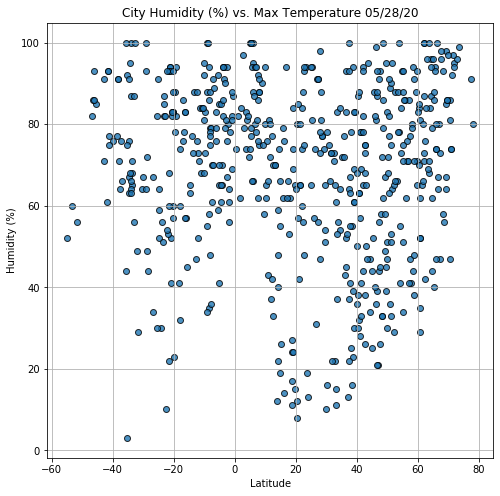

In [13]:
# Build the scatter plot for hummidity vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Humidity (%) vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

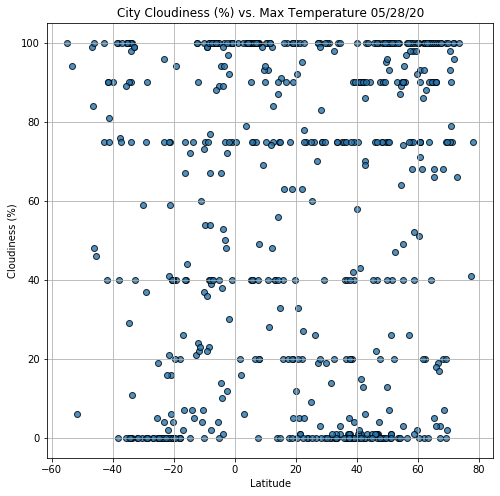

In [14]:
# Build the scatter plot for clowdyness vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Cloudiness (%) vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

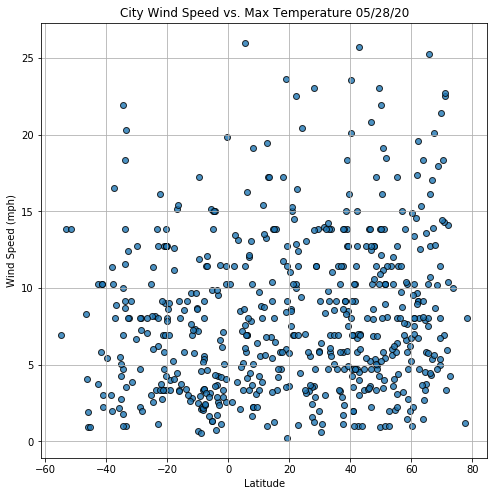

In [15]:
# Build the scatter plot for wind_speed vs. max temperature.

plt.figure(figsize=(8,8))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Wind Speed vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print("r value: ", r_value, "p value: ", p_value)

In [17]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

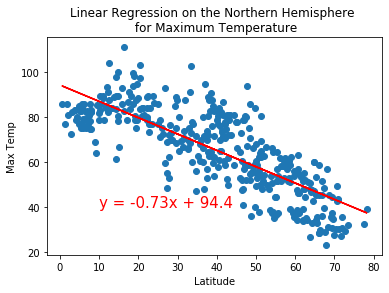

r value:  -0.7932559300948574 p value:  7.794242280653482e-86


In [18]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

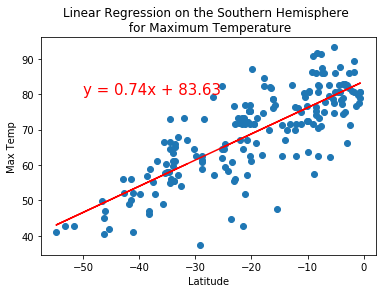

r value:  0.7894400005834221 p value:  2.7832045985145633e-41


In [19]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

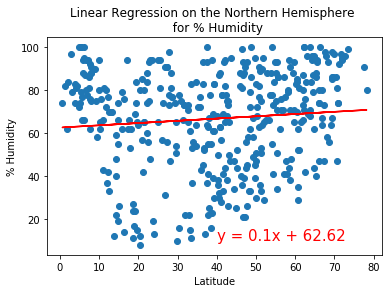

r value:  0.0912528507299232 p value:  0.07148353771509518


In [20]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for % Humidity', '% Humidity',(40,10))

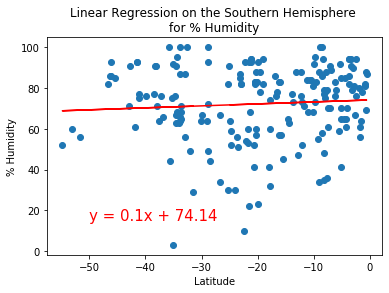

r value:  0.06884746933883835 p value:  0.3478295167006048


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

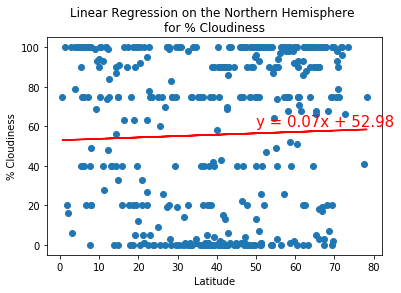

r value:  0.034505482957577424 p value:  0.4963019368181918


In [22]:
# Linear regression on the Norther Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,60))

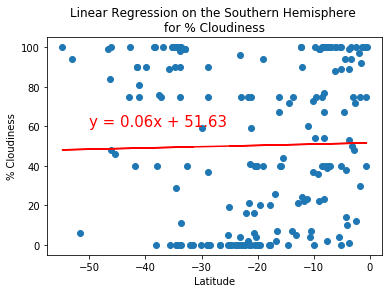

r value:  0.02184202709408255 p value:  0.766068833506451


In [23]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

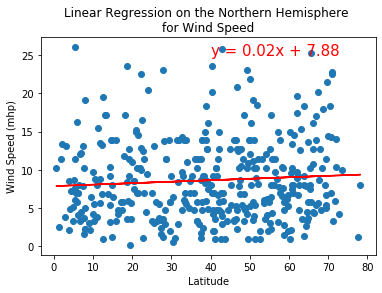

r value:  0.07298354044661932 p value:  0.1497380907056122


In [24]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mhp)',(40,25))

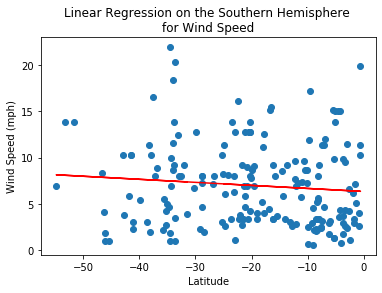

r value:  -0.09734093974634497 p value:  0.18387158290799246


In [25]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,25))